### READ ME

Use the code blocks below to answer each question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

In [2]:
# Question 0: Create a DataFrame with three rows and four columns. Name the
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [3]:
# Question 1:
# Import the spacy package (and install if if needed)
# Load the "en_core_web_sm" model into a variable
# Load the following text into that model: "I am a master builder of text analytics!"
# Print each token and the lemmatized version one-at-a-time using a loop

import spacy

nlp = spacy.load('en_core_web_sm')
text = "I am a master builder of text analytics!"
doc = nlp(text)

for token in doc:
    print(f"Token: {token.text}, Lemma: {token.lemma_}")


Token: I, Lemma: I
Token: am, Lemma: be
Token: a, Lemma: a
Token: master, Lemma: master
Token: builder, Lemma: builder
Token: of, Lemma: of
Token: text, Lemma: text
Token: analytics, Lemma: analytic
Token: !, Lemma: !


In [4]:
# Question 2:
# Conceptual question; no code required here.

In [5]:
# Question 3:
# Create a function that takes a string as input and builds a DataFrame based on the
# properties returned by the spacy model. The DataFrame should have the following columns:
# Index: Token, Columns: Lemma, POS, Tag, Dep, Shape, isAlpha, isStop
# Call the function using the same string as in Question 1 and print the resulting DataFrame.

import spacy
import pandas as pd

def spacyModel(string):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(string)
    data = []
    tokens = []
    lemmas = []
    pos = []
    tags = []
    deps = []
    shapes = []
    isAlphas = []
    isStops = []

    for token in doc:
        tokens.append(token.text)
        lemmas.append(token.lemma_)
        pos.append(token.pos_)
        tags.append(token.tag_)
        deps.append(token.dep_)
        shapes.append(token.shape_)
        isAlphas.append(token.is_alpha)
        isStops.append(token.is_stop)

    df = pd.DataFrame(data={'Token': tokens, 'Lemma': lemmas, 'POS': pos, 'Tag': tags, 'Dep': deps, 'Shape': shapes, 'isAlpha': isAlphas, 'isStop': isStops})

    return df

string = "I am a master builder of text analytics!"
spacyModel(string)

,Token,Lemma,POS,Tag,Dep,Shape,isAlpha,isStop
0,I,I,PRON,PRP,nsubj,X,True,True
1,am,be,AUX,VBP,ROOT,xx,True,True
2,a,a,DET,DT,det,x,True,True
3,master,master,NOUN,NN,compound,xxxx,True,False
4,builder,builder,NOUN,NN,attr,xxxx,True,False
5,of,of,ADP,IN,prep,xx,True,True
6,text,text,NOUN,NN,compound,xxxx,True,False
7,analytics,analytic,NOUN,NNS,pobj,xxxx,True,False
8,!,!,PUNCT,.,punct,!,False,False


In [6]:
# Question 4:
# Conceptual question; no code required here.

In [7]:
# Question 5:
# Create a function that takes a string as input and returns only the lemmatized
# tokens that are not stop words. Also, create a parameter for the function that
# allows the user to specify which parts of speech should be kept. Return the string
# as a list of words.

# Call the function using the same string as in the first question. Only allow nouns,
# verbs, adjectives, and adverbs to be returned. Print the resulting list without modifications.

import nltk
import spacy
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words_nltk = set(stopwords.words('english'))

def lemmatization(string, *args):
    # Load the spacy model
    nlp = spacy.load("en_core_web_sm")

    # Process the string with spacy
    doc = nlp(string)

    # Initialize a list to hold tokens
    tokens = []

    # Convert variable arguments to a set for faster lookup
    pos_to_keep = set(args)

    for token in doc:
        # Check if the token is not a stop word and belongs to the specified parts of speech
        if token.pos_ in pos_to_keep and token.lemma_ not in stop_words_nltk:
            tokens.append(token.lemma_)

    return tokens

# Sample string from the first question
new_string = "I am a master builder of text analytics!"

# Call the lemmatization function with specified parts of speech
result = lemmatization(new_string, 'NOUN', 'VERB', 'ADJ', 'ADV')

# Print the resulting list without modifications
print(result)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['master', 'builder', 'text', 'analytic']


In [8]:
# Question 6:
# Conceptual question; no code required here.


In [9]:
# Question 7: Import the dataset that came with this assignment into a Pandas DataFrame.
# Print the shape and the first five rows of the DataFrame.
df = pd.read_csv('tw_tweets_users_media_places.csv')
print(df.shape)
df.head()

(534, 34)


,tweet_id,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,...,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type
0,1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,...,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city
1,1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,...,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city
2,1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,...,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city
3,1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,...,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city
4,1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,...,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city


In [10]:
# Question 8:
# Using either the functions provided in the book chapter or some that you create yourself,
# add the following columns to this DataFrame:

# - Number of words or tokens in the post
# - Number of Nouns in the post
# - Number of Verbs in the post
# - Number of Adjectives in the post
# - Number of Adverbs in the post
# - Number of Persons referenced in the post
# - Number of Organizations referenced in the post
# - Number of Locations (GPE) referenced in the post
# - Number of Products referenced in the post
# - Number of Events referenced in the post

# These counts should all be based on the determinations made by the spacy model. Print the
# first 5 records in the DataFrame with these new columns. Also print the sum of each of these
# new columns.

# How many total events are referenced in the dataset based on the spacy model?
# Function to count number of words or tokens
import pandas as pd
import spacy
def count_tokens(text):
    doc = nlp(text)
    return len(doc)

# Function to count number of specific POS tags
def count_pos(text, pos):
    doc = nlp(text)
    return len([token for token in doc if token.pos_ == pos])

# Function to count references to specific entities
def count_entities(text, label):
    doc = nlp(text)
    return len([ent.text for ent in doc.ents if ent.label_ == label])

# Add new columns to the DataFrame
df['Number of words or tokens'] = df['text'].apply(count_tokens)
df['Number of Nouns'] = df['text'].apply(lambda x: count_pos(x, 'NOUN'))
df['Number of Verbs'] = df['text'].apply(lambda x: count_pos(x, 'VERB'))
df['Number of Adjectives'] = df['text'].apply(lambda x: count_pos(x, 'ADJ'))
df['Number of Adverbs'] = df['text'].apply(lambda x: count_pos(x, 'ADV'))
df['Number of Persons referenced'] = df['text'].apply(lambda x: count_entities(x, 'PERSON'))
df['Number of Organizations referenced'] = df['text'].apply(lambda x: count_entities(x, 'ORG'))
df['Number of Locations (GPE) referenced'] = df['text'].apply(lambda x: count_entities(x, 'GPE'))
df['Number of Products referenced'] = df['text'].apply(lambda x: count_entities(x, 'PRODUCT'))
df['Number of Events referenced'] = df['text'].apply(lambda x: count_entities(x, 'EVENT'))

# Print the first 5 records
print(df.head())


# Count total number of events referenced in the dataset
total_events = df['Number of Events referenced'].sum()
print(f"\nTotal number of events referenced in the dataset: {total_events}")

              tweet_id                                               text  \
0  1440484799970304000  This was my grandson this morning (w/autism)! ...   
1  1439618825171963904  Wow!! Been into #York for the first time since...   
2  1248872872837332992  Sad number of ppl who lost life due to covid-1...   
3  1250729294051053568  Webinar now available‘Staying healthy at home ...   
4  1249612131433095168  Webinar now available‘Staying healthy at home ...   

   context_annotations_count  count_annotations  count_cashtags  \
0                          1                0.0             0.0   
1                          2                2.0             0.0   
2                          3                0.0             0.0   
3                          1                2.0             0.0   
4                          1                2.0             0.0   

   count_hashtags  count_mentions  count_urls          created_at_tweet lang  \
0             0.0             0.0         1.0  2021-09

In [11]:
# Question 9:
# Next, we are going to build a topic model for this dataset. As usual, follow the instructions in the order they are given to be successful. The process flows like a pipeline, unless specified otherwise, you will use the data generated in each step for the step that follows in a linear fashion--just like it flows in the chapter. You are welcome to use any of the functions you find in the chapter. But, although it is good practice to create a pipeline with functions, using functions is not required for the rest of this assignment.

# First, create a dataset of the post 'text' column that has all email addresses, new line breaks, single quotes, and urls removed. You can store this cleaned dataset however you'd like: in a list, a Pandas Series, as a new column in the original DataFrame, or something else. We are following the process that we went through in the chapter. If you're not sure what I'm talking about, then you probably need to take a look at the chapter.

# Print out the first five documents in the dataset after being cleaned as described above. Remember, this is the list of text documents (posts). Not the entire DataFrame.

import re

df = df.loc[~df['text'].str.contains("RT @")] # Remove anything containing the 'RT @' text
df = df.drop_duplicates(subset=['text'])

def re_mod(doc):
  import re
  doc = re.sub('\\S*@\\S*\\s?', '', doc)  # remove emails
  doc = re.sub('\\s+', ' ', doc)          # remove newline chars
  doc = re.sub("\\'", "", doc)            # remove single quotes
  doc = re.sub(r"http\S+", "url", doc)    # replace URLs with 'url'
  return doc

# Convert each tweet to a list of cleaned words and add to a master list
docs = df['text'].map(lambda x: re_mod(x)).values.tolist()

# Print the first five records to see what they look like
for doc in docs[:5]:
  print(doc)

This was my grandson this morning (w/autism)! Apparently he is going through a bout of bronchitis &amp; pneumonia he always gets it every year! My daughter said that she is sure she will have to take him to the hospital tonight but if they try to test him for covid she will walk out url
Wow!! Been into #York for the first time since Christmas shopping in Dec 2019. Took our daughter Cerys to the #CatCafe to celebrate her 10th birthday. Perfectly relaxed, quiet, covid unfriendly AND #Autism friendly. She was in her happy place. 😍🐈‍⬛ url
Sad number of ppl who lost life due to covid-19 is far more than the number that it says on the news. Those who pass away in care homes, supported living or in the community are not counted. Give a thought of autistic people &amp; with learning disabilities- every life matters❤️ url
Webinar now available‘Staying healthy at home during the coronavirus crisis’ deliver by Matthew Roberts and Steve Hardy #LearningDisability #autism #socialcare url url
Webinar

In [12]:
# Question 10:
# Next, we are going to tokenize the documents. At the same time, we will remove stop words and punctuation. We will also return the lemmatized version of each token--just like we did in the chapter. Perform that step on the dataset you created in the previous question. Print out the first five documents in the dataset after being tokenized.
import spacy
import nltk
from nltk.corpus import stopwords

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Download NLTK stopwords
nltk.download('stopwords')

# Get NLTK stopwords
stop_words_nltk = stopwords.words('english')

print(f'Stopwords in NLTK:\t{len(stop_words_nltk)}')
print(stop_words_nltk)

# Function to tokenize, remove stop words, punctuation, and perform lemmatization
def tokenize_lemma_stop(doc, stop_words):
    return [token.lemma_ for token in doc if not token.lemma_ in stop_words and not token.text in stop_words and not token.is_punct]

# Tokenize, preprocess, and lemmatize the cleaned text
docs = [tokenize_lemma_stop(nlp(doc), stop_words_nltk) for doc in docs]

# Print the first 5 tokenized documents
for doc in docs[:5]:
    print(doc)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords in NLTK:	179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 

In [13]:
# Question 11: Build bigram, trigram, and fourgram models. Use a threshold of 50 and
# a min_count of 5 for each of them. Apply these models to the dataset you created in
# the previous question. Print out the first five documents in the dataset after being
# processed by the bigram, trigram, and fourgram models.

import gensim

# Assuming `tokenized_text` contains your tokenized documents from the previous steps
# docs = docs

# Build bigram model
bigram = gensim.models.Phrases(docs, min_count=5, threshold=50)
bigram_mod = gensim.models.phrases.Phraser(bigram)

# Build trigram model
trigram = gensim.models.Phrases(bigram[docs], min_count=5, threshold=50)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Build fourgram model
fourgram = gensim.models.Phrases(trigram[bigram[docs]], min_count=5, threshold=50)
fourgram_mod = gensim.models.phrases.Phraser(fourgram)

# Apply models to the dataset
bigram_tokenized_text = [bigram_mod[doc] for doc in docs]
trigram_tokenized_text = [trigram_mod[bigram_mod[doc]] for doc in docs]
fourgram_tokenized_text = [fourgram_mod[trigram_mod[bigram_mod[doc]]] for doc in docs]


# Which n-grams were generated? Let's put their results in a DataFrame just to understand
bigram_list = list(bigram_mod.phrasegrams.keys())
trigram_list = list(trigram_mod.phrasegrams.keys())
fourgram_list = list(fourgram_mod.phrasegrams.keys())

df_ngrams = pd.DataFrame(columns=['bigrams', 'trigrams', 'fourgrams'],
                          index=list(bigram_list + trigram_list + fourgram_list))
df_ngrams.drop_duplicates(inplace=True)

for ngram in bigram_list + trigram_list + fourgram_list:
  if ngram in bigram_list: df_ngrams.at[ngram, 'bigrams'] = 'x'
  if ngram in trigram_list: df_ngrams.at[ngram, 'trigrams'] = 'x'
  if ngram in fourgram_list: df_ngrams.at[ngram, 'fourgrams'] = 'x'

pd.set_option('display.max_rows', None)
df_ngrams.head()

# Print the first 5 documents processed by the bigram, trigram, and fourgram models
print("Bigram Model Output:")
for doc in bigram_tokenized_text[:5]:
    print(doc)
print("\nTrigram Model Output:")
for doc in trigram_tokenized_text[:5]:
    print(doc)
print("\nFourgram Model Output:")
for doc in fourgram_tokenized_text[:5]:
    print(doc)

Bigram Model Output:
['grandson', 'morning', 'w', 'autism', 'apparently', 'go', 'bout', 'bronchitis', 'amp', 'pneumonia', 'always', 'get', 'every', 'year', 'daughter', 'say', 'sure', 'take', 'hospital', 'tonight', 'try', 'test', 'covid', 'walk', 'url']
['wow', 'York', 'first', 'time', 'since', 'Christmas', 'shopping', 'Dec', '2019', 'take', 'daughter', 'Cerys', 'CatCafe', 'celebrate', '10th', 'birthday', 'perfectly', 'relaxed', 'quiet', 'covid', 'unfriendly', 'autism', 'friendly', 'happy', 'place', '😍', '🐈', '\u200d', '⬛', 'url']
['sad', 'number', 'ppl', 'lose', 'life', 'due', 'covid-19', 'far', 'number', 'say', 'news', 'pass', 'away', 'care', 'home', 'support', 'live', 'community', 'count', 'give', 'thought', 'autistic', 'people', 'amp', 'learn', 'disabilities-', 'every', 'life', 'matter', '❤_️', 'url']
['Webinar', 'available‘staye', 'healthy', 'home', 'coronavirus', 'crisis', 'deliver', 'Matthew', 'Roberts', 'Steve', 'Hardy', 'LearningDisability', 'autism', 'socialcare', 'url', 'url'

In [14]:
# Question 12: Create a dictionary and courpus and build your LDA
# model using 4 topics. Set the random_state to 1. Set the
# chuncksize to 20, passes to 10, and per_word_topics to True. Do not
# set or adjust any other parameters (even if the example in the
# book does). Print out the topic weights for the 10 most important
# words in each topic.

# What weight does the term "autism" have on Topic 0?

from gensim import corpora
from gensim.models import LdaModel

# Create a dictionary and corpus
id2word = corpora.Dictionary(docs)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=10,
                     random_state=1,
                     chunksize=20,
                     passes=10,
                     per_word_topics=True)

# Print out the topic weights for the 10 most important words in each topic
for topic_id in range(4):
    print(f"\nTopic {topic_id}:")
    topic_terms = lda_model.get_topic_terms(topic_id, topn=10)
    for term_id, weight in topic_terms:
        term = id2word[term_id]
        print(f"{term}: {weight}")

# Check the weight of the term "autism" in Topic 0
topic_0_terms = lda_model.get_topic_terms(0, topn=len(id2word))
for term_id, weight in topic_0_terms:
    term = id2word[term_id]
    if term == "autism":
        print(f"\nWeight of 'autism' in Topic 0: {weight}")
        break


Topic 0:
coronavirus: 0.08382155001163483
autismawareness: 0.03743712604045868
downsyndrome: 0.01760997250676155
light: 0.016345420852303505
explain: 0.012919182889163494
healthy: 0.011589962057769299
downsyndromeawareness: 0.0113223223015666
balance: 0.011287114582955837
autismfitness: 0.010877539403736591
actuallyautistic: 0.010799604468047619

Topic 1:
covid_19: 0.022888174280524254
Paws: 0.01770138181746006
together: 0.015385019592940807
Challenge: 0.012213164009153843
show: 0.009175824001431465
Dog: 0.008662261068820953
documentary: 0.0063840351067483425
radio: 0.004724446684122086
en: 0.0036883652210235596
Theft: 0.0025642248801887035

Topic 2:
☆: 0.0016048585530370474
aku: 0.0007026167586445808
lie: 0.0006620103376917541
doa: 0.0005492313066497445
lagi: 0.0003856280236504972
mai: 0.0003856280236504972
siap: 0.0003856280236504972
jumpa: 0.0003856280236504972
semoga: 0.0003856280236504972
nak: 0.0003856280236504972

Topic 3:
overload: 0.02868179976940155
practice: 0.0223868060857

In [15]:
# Question 13: Generate LDA models for n = 3 through 9 topics and compare their perplexity
# and coherence scores. Keep all other parameter settings used in the prior question.
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Define the range of topics
topics_range = range(3, 10)

# Initialize lists to store perplexity and coherence scores
perplexity_scores = []
coherence_scores = []

# Create a dictionary and corpus
id2word = corpora.Dictionary(docs)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Iterate over the range of topics
for num_topics in topics_range:
    # Build LDA model
    lda_model = LdaModel(corpus=corpus,
                         id2word=id2word,
                         num_topics=num_topics,
                         random_state=1,
                         chunksize=20,
                         passes=10,
                         per_word_topics=True)

    # Compute perplexity score
    perplexity = lda_model.log_perplexity(corpus)
    perplexity_scores.append(perplexity)

    # Compute coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)

    # Print results
    print(f"Num Topics: {num_topics}, Perplexity Score: {perplexity}, Coherence Score: {coherence_score}")

Num Topics: 3, Perplexity Score: -7.868311923322182, Coherence Score: 0.2691227879819806
Num Topics: 4, Perplexity Score: -8.012054935898474, Coherence Score: 0.28549287639177284
Num Topics: 5, Perplexity Score: -8.117791025252876, Coherence Score: 0.31010900342149694
Num Topics: 6, Perplexity Score: -8.221158275539045, Coherence Score: 0.30588854082348205
Num Topics: 7, Perplexity Score: -8.306984418313139, Coherence Score: 0.3456917562982539
Num Topics: 8, Perplexity Score: -8.45085364818725, Coherence Score: 0.40455727551407916
Num Topics: 9, Perplexity Score: -8.633583787030874, Coherence Score: 0.3864678886421082


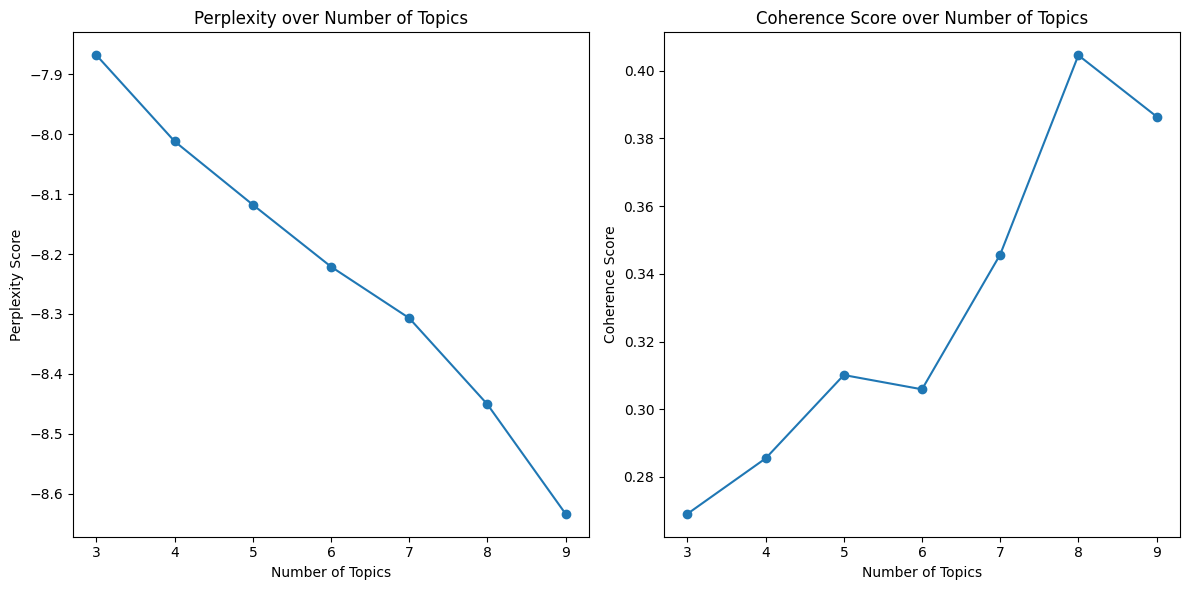

In [16]:
# Question 14: Visualize results of comparing the perplexity/coherence from the previous
# question.
plt.figure(figsize=(12, 6))

# Plot Perplexity
plt.subplot(1, 2, 1)
plt.plot(topics_range, perplexity_scores, '-o')
plt.title('Perplexity over Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')

# Plot Coherence
plt.subplot(1, 2, 2)
plt.plot(topics_range, coherence_scores, '-o')
plt.title('Coherence Score over Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

plt.tight_layout()
plt.show()


In [17]:
# Question 15: Build one more LDA model with 9 topics. Keep the other parameters the same as all prior LDA models. Then, generate new features (one for each topic) and then generate a topic score for every document. Add these new topic scores to the version of the DataFrame that includes the new features representing the counts of parts of speech and named entities required earlier in this assignment.
from gensim.models import LdaModel

# Create a dictionary and corpus
id2word = corpora.Dictionary(docs)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Build LDA model with four topics
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=4,
                     random_state=1,
                     chunksize=20,
                     passes=10,
                     per_word_topics=True)

# Get topic scores for each document
topic_scores = [lda_model.get_document_topics(doc)[0][1] for doc in corpus]

# Add topic scores to the DataFrame
df['Topic_0_Score'] = [score for score in topic_scores]

# Print the first few rows of the DataFrame to verify
print(df.head())

              tweet_id                                               text  \
0  1440484799970304000  This was my grandson this morning (w/autism)! ...   
1  1439618825171963904  Wow!! Been into #York for the first time since...   
2  1248872872837332992  Sad number of ppl who lost life due to covid-1...   
3  1250729294051053568  Webinar now available‘Staying healthy at home ...   
4  1249612131433095168  Webinar now available‘Staying healthy at home ...   

   context_annotations_count  count_annotations  count_cashtags  \
0                          1                0.0             0.0   
1                          2                2.0             0.0   
2                          3                0.0             0.0   
3                          1                2.0             0.0   
4                          1                2.0             0.0   

   count_hashtags  count_mentions  count_urls          created_at_tweet lang  \
0             0.0             0.0         1.0  2021-09

              tweet_id                                               text  \
0  1440484799970304000  This was my grandson this morning (w/autism)! ...   
1  1439618825171963904  Wow!! Been into #York for the first time since...   
2  1248872872837332992  Sad number of ppl who lost life due to covid-1...   
3  1250729294051053568  Webinar now available‘Staying healthy at home ...   
4  1249612131433095168  Webinar now available‘Staying healthy at home ...   

   context_annotations_count  count_annotations  count_cashtags  \
0                          1                0.0             0.0   
1                          2                2.0             0.0   
2                          3                0.0             0.0   
3                          1                2.0             0.0   
4                          1                2.0             0.0   

   count_hashtags  count_mentions  count_urls          created_at_tweet lang  \
0             0.0             0.0         1.0  2021-09

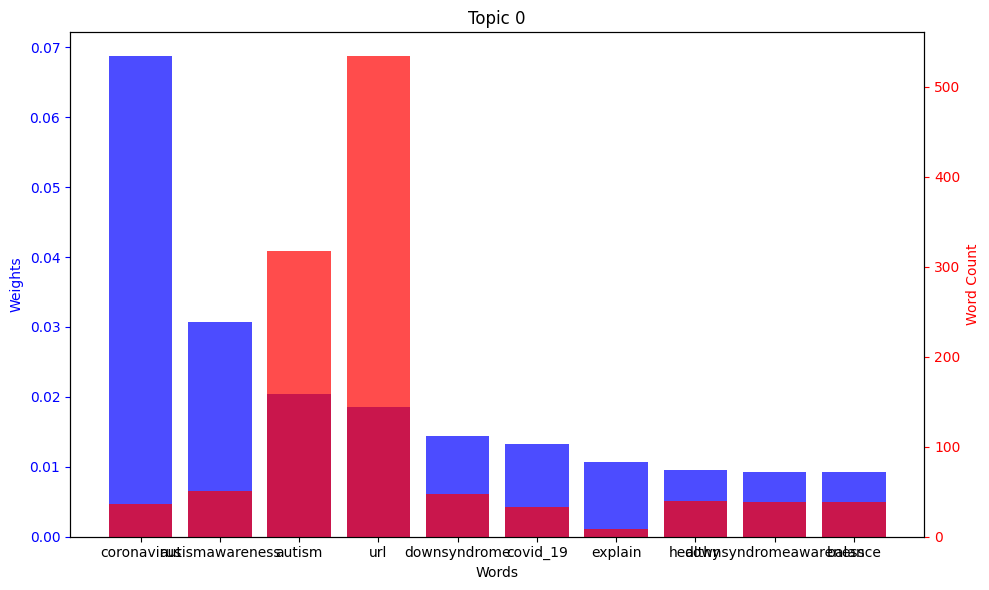

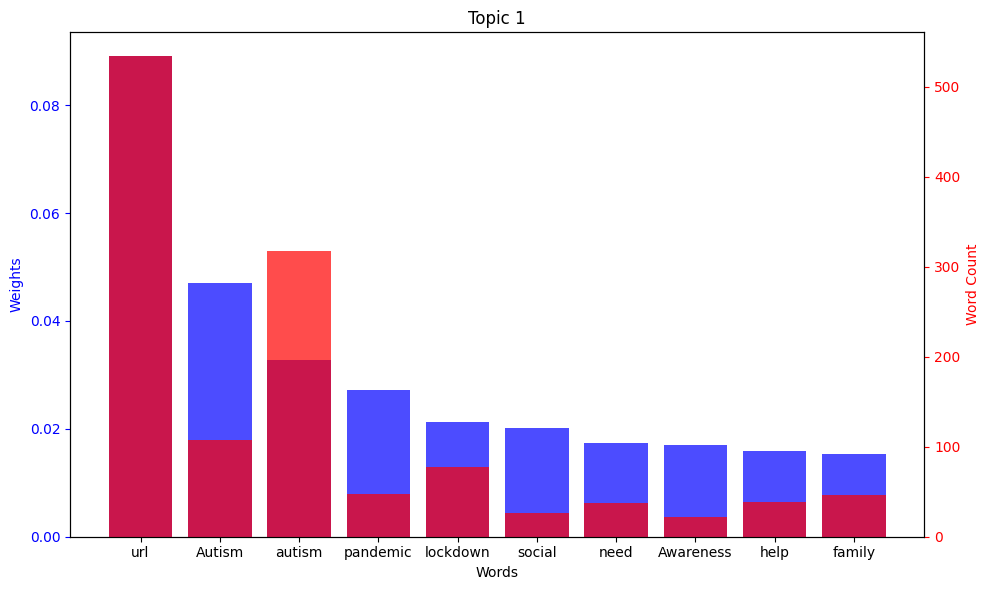

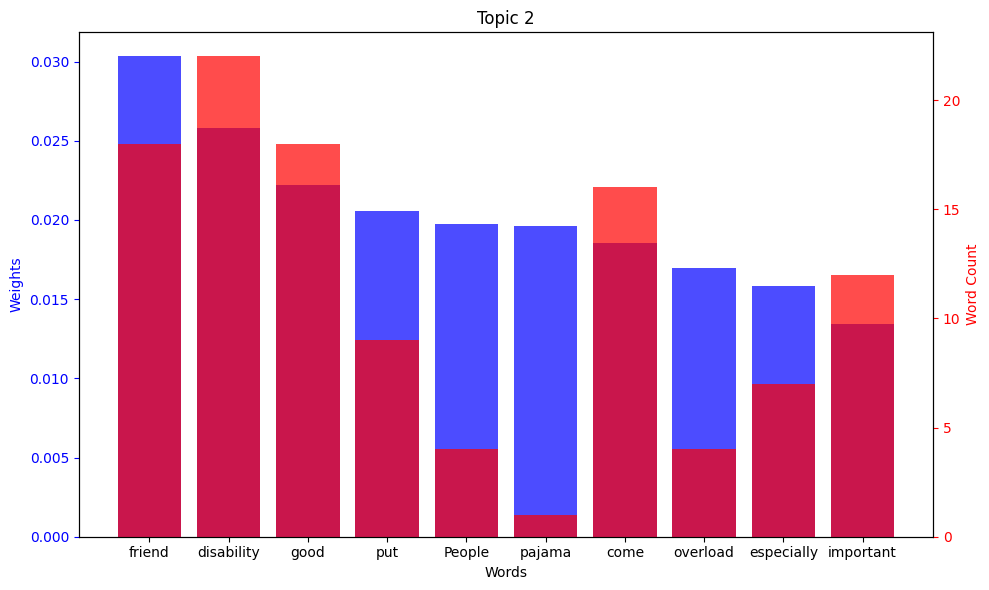

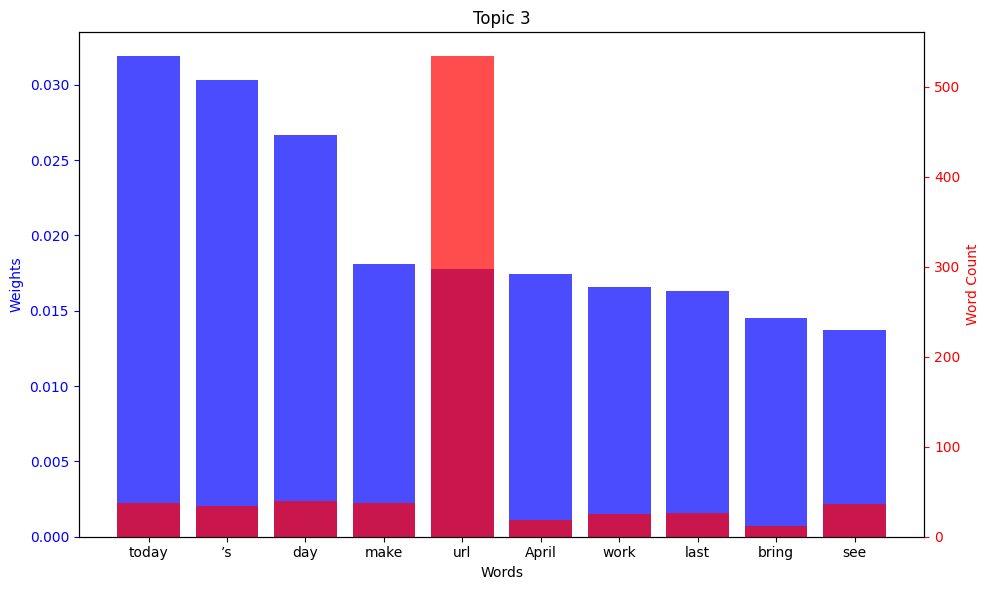

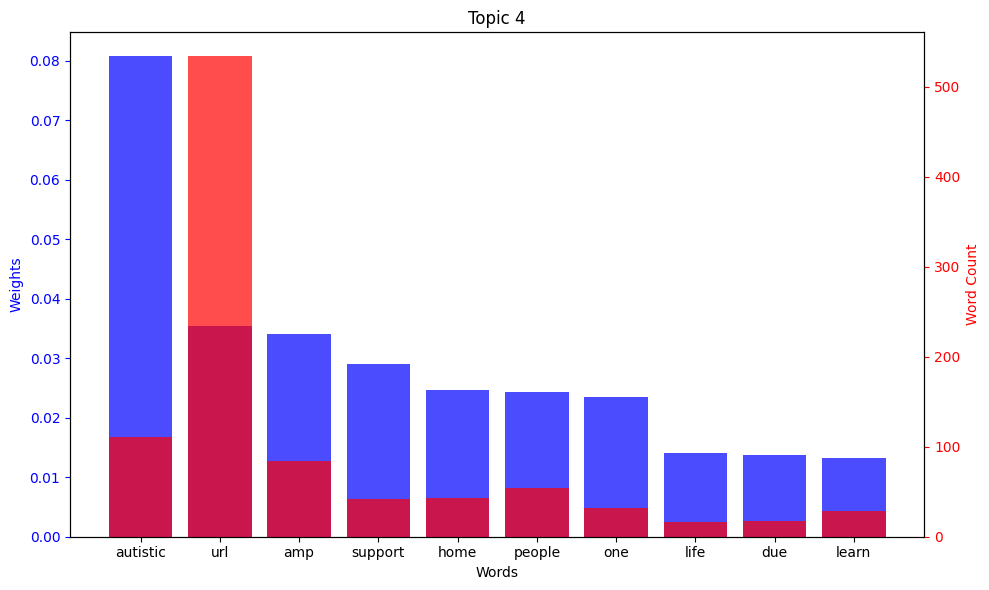

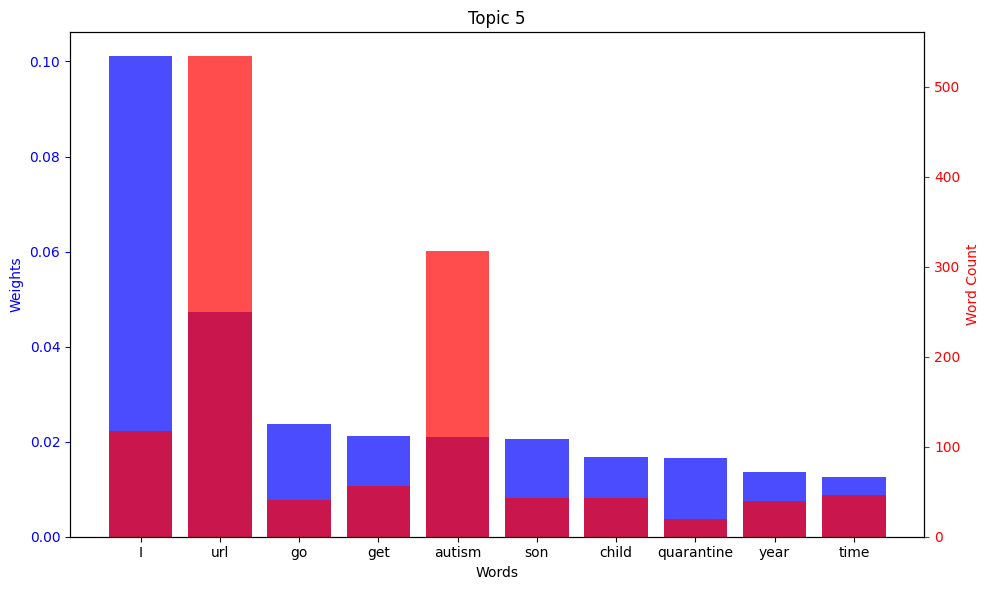

C:\Users\User\AppData\Local\Temp\ipykernel_15304\4132140931.py:57: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_15304\4132140931.py:57: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


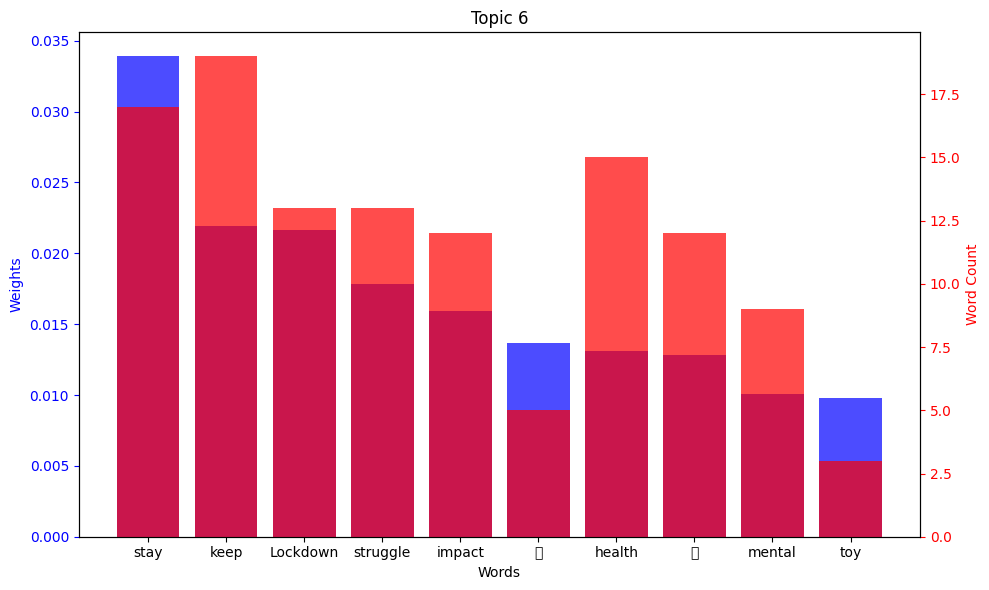

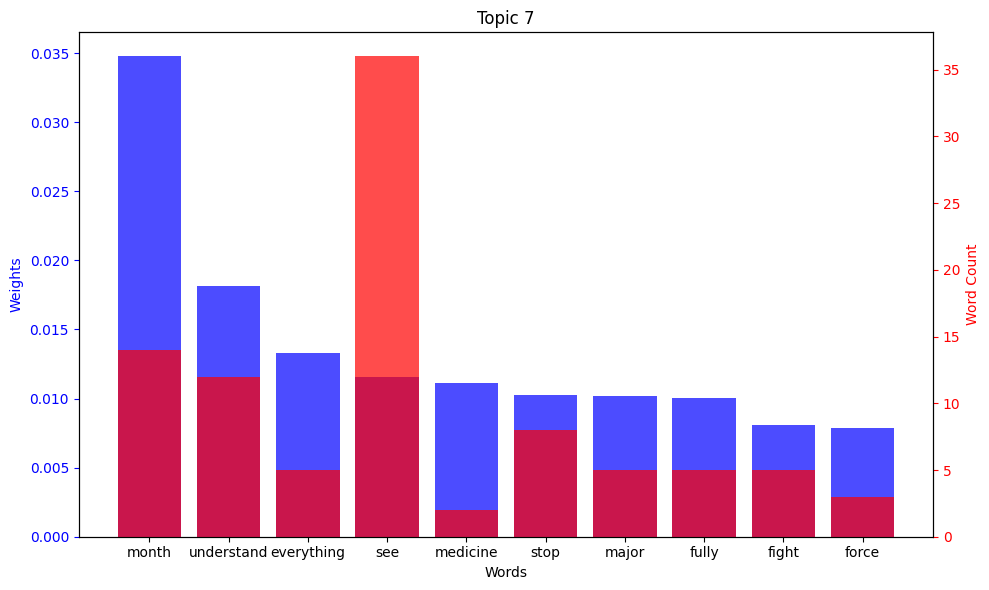

C:\Users\User\AppData\Local\Temp\ipykernel_15304\4132140931.py:57: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_15304\4132140931.py:57: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_15304\4132140931.py:57: UserWarning: Glyph 129308 (\N{RIGHT-FACING FIST}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from current font.

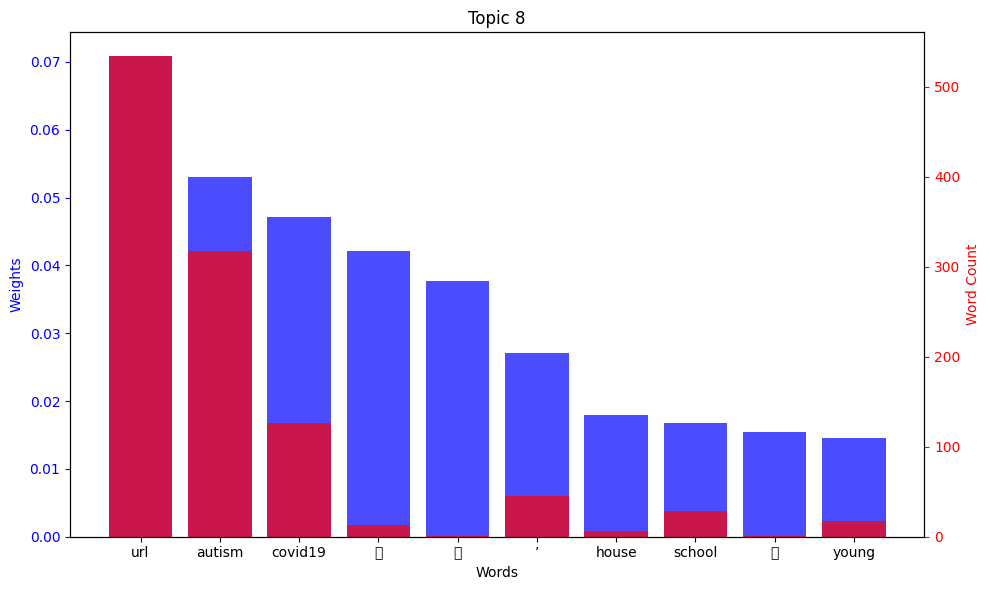

Words to be added to the stop words list: ['autism', 'url', 'see']


In [18]:
# Question 16:
# Create a bar chart of word counts for all topics. Plot Word Count and Weights
# of Topic Keywords as demonstrated in the chapter.

from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

# Assuming 'docs' is your list of tokenized documents and 'df' is your DataFrame

# Create a dictionary and corpus
id2word = corpora.Dictionary(docs)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Build LDA model with nine topics
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=9,
                     random_state=1,
                     chunksize=20,
                     passes=10,
                     per_word_topics=True)

# Get topic scores for each document
topic_scores = [lda_model.get_document_topics(doc, minimum_probability=0.0) for doc in corpus]

# Add topic scores to the DataFrame
for i in range(9):
    df[f'Topic_{i}_Score'] = [next((prob for topic, prob in doc if topic == i), 0.0) for doc in topic_scores]

# Print the first few rows of the DataFrame to verify
print(df.head())

# Create a bar chart of word counts for all topics
topics = lda_model.show_topics(num_topics=9, formatted=False)

for i, topic in topics:
    words = [word[0] for word in topic]
    weights = [word[1] for word in topic]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(words, weights, color='blue', alpha=0.7)
    ax1.set_xlabel('Words')
    ax1.set_ylabel('Weights', color='blue')
    ax1.tick_params('y', colors='blue')

    ax2 = ax1.twinx()
    ax2.bar(words, [id2word.dfs[id2word.token2id[word]] for word in words], color='red', alpha=0.7)
    ax2.set_ylabel('Word Count', color='red')
    ax2.tick_params('y', colors='red')

    plt.title(f"Topic {i}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Determine which words should be added to the stop words list
common_words = defaultdict(int)
for i, topic in topics:
    for word, weight in topic:
        common_words[word] += 1

# Print words that appear in more than one topic
stop_words = [word for word, count in common_words.items() if count > 1]
print("Words to be added to the stop words list:", stop_words)





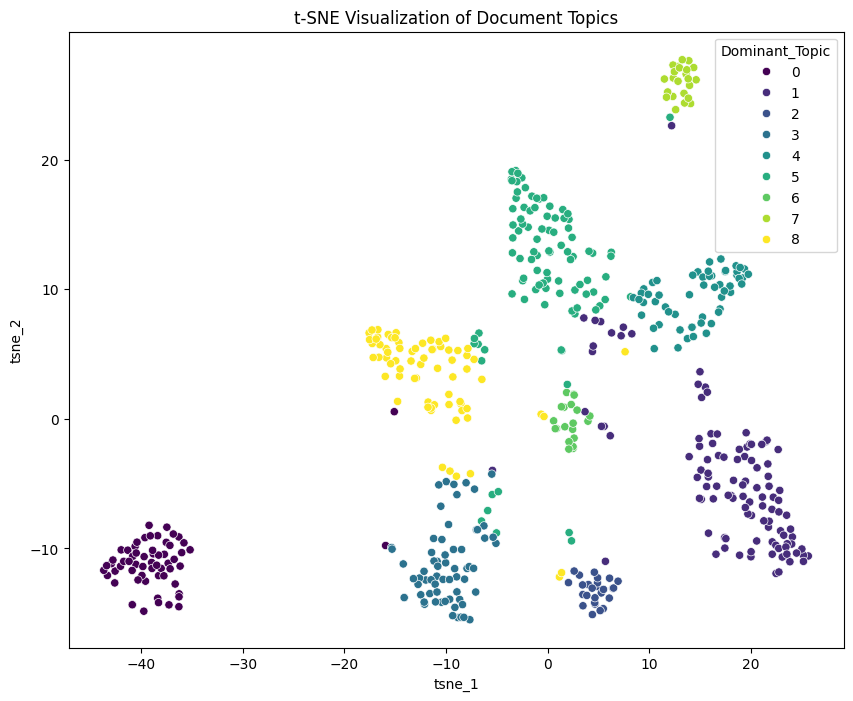

In [19]:
# Question 17:
# Visualize the number of documents/tweets attributed to each topic is through
# a t-distributed Stochastic Neighbor Embedding (SNE) chart.

from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the topic distribution for each document
topic_distributions = [lda_model.get_document_topics(doc, minimum_probability=0.0) for doc in corpus]

# Extract dominant topic for each document
dominant_topics = [max(topics, key=lambda x: x[1])[0] if topics else None for topics in topic_distributions]

# Convert topic distributions to numpy array
topic_dist_np = np.array([[prob for topic, prob in doc] for doc in topic_distributions])

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=1)
tsne_results = tsne.fit_transform(topic_dist_np)

# Create DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
tsne_df['Dominant_Topic'] = dominant_topics

# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Dominant_Topic', palette='viridis', data=tsne_df, legend='full')
plt.title('t-SNE Visualization of Document Topics')
plt.show()

In [20]:
# Question 18:
# Print out an interactive visualization with pyLDAvis.
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd

# Assuming 'docs' is your list of tokenized documents

# Create a dictionary and corpus
id2word = corpora.Dictionary(docs)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=9,
                     random_state=1,
                     chunksize=20,
                     passes=10,
                     per_word_topics=True)

# Prepare the data for visualization
vis_data = gensimvis.prepare(lda_model, corpus, id2word)

# Display the visualization
pyLDAvis.display(vis_data)
